In [1]:
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from utils import *
import warnings
warnings.filterwarnings('ignore')

# classifications
classifiers = ['SVM','LR']
y = np.asarray([int(e) for e in open('output_data/y.txt') if e.strip()])

model_data = {}
model_data['non_graph'] = 'non_graph'
model_data['PPI'] = 'ppi_graph_feature'
model_data['LIONESS'] = 'lioness_graph_feature'
model_data['PAN_KEGG'] = 'pan_KEGG_graph_feature'
model_data['PAN_HPO'] = 'pan_HPO_graph_feature'
model_data['PAN_DO'] = 'pan_DO_graph_feature'

with open('result.csv','w') as f: # save classification performance in "result.csv'"
    f.write('model,classifier,fold,F1,Precision,Recall,Specificity,Accuracy,AUC\n')
    for model in model_data:
        print('\nclassification performance for ', model)
    #     load data
        X = pd.read_csv('output_data/' + model_data[model] + '.csv', header=None, sep=',')
        X = X.rank(pct=True, numeric_only=True)
        X = X.values.astype(np.float32)
        for classifier in classifiers:
            print('\nclassifier:',classifier)
            print('model,classifier,fold,F1,Precision,Recall,Specificity,Accuracy,AUC')
            for fold in range(10):
                train_idx = np.array([int(e) for e in open('10fold_idx/train_idx-' + str(fold+1) + '.txt')]) 
                test_idx = np.array([int(e) for e in open('10fold_idx/test_idx-' + str(fold+1) + '.txt')])
                X_train, X_test, y_train, y_test = X[train_idx],X[test_idx],y[train_idx],y[test_idx]
                if classifier=='LR':
                    clf = LogisticRegression()
                    y_pred = clf.fit(X_train,y_train).predict(X_test)
                    result = evaluate(y_test, y_pred)
                else:
                    parameters = {'C':[0.01, 0.1, 1.0]}
                    svc = svm.SVC(gamma=.01,kernel='linear')
                    clf = GridSearchCV(svc, parameters, cv=5)
                    y_pred = clf.fit(X_train,y_train).predict(X_test)
                    result = evaluate(y_test, y_pred)
                result = [round(e,3) for e in result]
                result = [model, classifier,str(fold+1)] + result
                st = ','.join(map(str,result)) + '\n'
                f.write(st)
                print(result)   


classification performance for  non_graph

classifier: SVM
model,classifier,fold,F1,Precision,Recall,Specificity,Accuracy,AUC
['non_graph', 'SVM', '1', 0.609, 0.609, 0.609, 0.625, 0.617, 0.617]
['non_graph', 'SVM', '2', 0.642, 0.567, 0.739, 0.458, 0.596, 0.599]
['non_graph', 'SVM', '3', 0.652, 0.652, 0.652, 0.667, 0.66, 0.659]
['non_graph', 'SVM', '4', 0.627, 0.571, 0.696, 0.5, 0.596, 0.598]
['non_graph', 'SVM', '5', 0.5, 0.524, 0.478, 0.583, 0.532, 0.531]
['non_graph', 'SVM', '6', 0.667, 0.64, 0.696, 0.625, 0.66, 0.66]
['non_graph', 'SVM', '7', 0.609, 0.609, 0.609, 0.625, 0.617, 0.617]
['non_graph', 'SVM', '8', 0.4, 0.471, 0.348, 0.625, 0.489, 0.486]
['non_graph', 'SVM', '9', 0.609, 0.609, 0.609, 0.625, 0.617, 0.617]
['non_graph', 'SVM', '10', 0.615, 0.552, 0.696, 0.458, 0.574, 0.577]

classifier: LR
model,classifier,fold,F1,Precision,Recall,Specificity,Accuracy,AUC
['non_graph', 'LR', '1', 0.558, 0.6, 0.522, 0.667, 0.596, 0.594]
['non_graph', 'LR', '2', 0.612, 0.577, 0.652, 0.542, 0

['PAN_DO', 'LR', '1', 0.667, 0.682, 0.652, 0.708, 0.681, 0.68]
['PAN_DO', 'LR', '2', 0.609, 0.609, 0.609, 0.625, 0.617, 0.617]
['PAN_DO', 'LR', '3', 0.76, 0.704, 0.826, 0.667, 0.745, 0.746]
['PAN_DO', 'LR', '4', 0.653, 0.615, 0.696, 0.583, 0.638, 0.639]
['PAN_DO', 'LR', '5', 0.522, 0.522, 0.522, 0.542, 0.532, 0.532]
['PAN_DO', 'LR', '6', 0.679, 0.6, 0.783, 0.5, 0.638, 0.641]
['PAN_DO', 'LR', '7', 0.609, 0.609, 0.609, 0.625, 0.617, 0.617]
['PAN_DO', 'LR', '8', 0.706, 0.643, 0.783, 0.583, 0.681, 0.683]
['PAN_DO', 'LR', '9', 0.553, 0.542, 0.565, 0.542, 0.553, 0.553]
['PAN_DO', 'LR', '10', 0.691, 0.594, 0.826, 0.458, 0.638, 0.642]


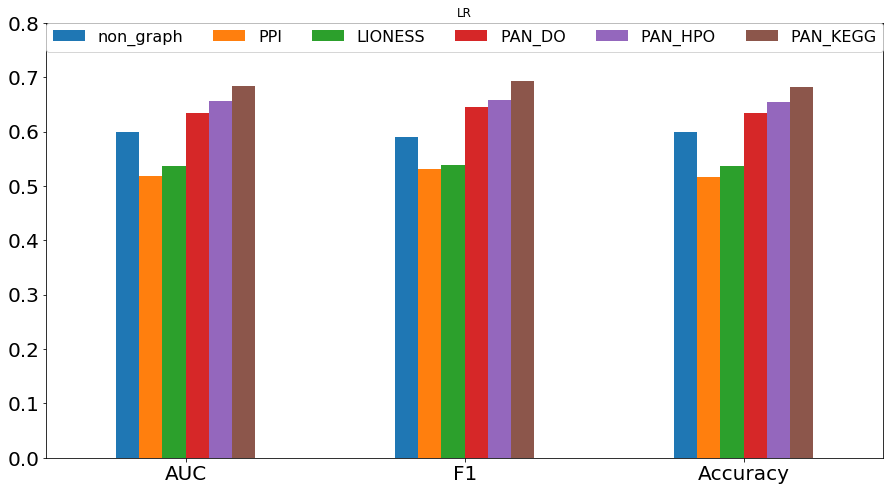

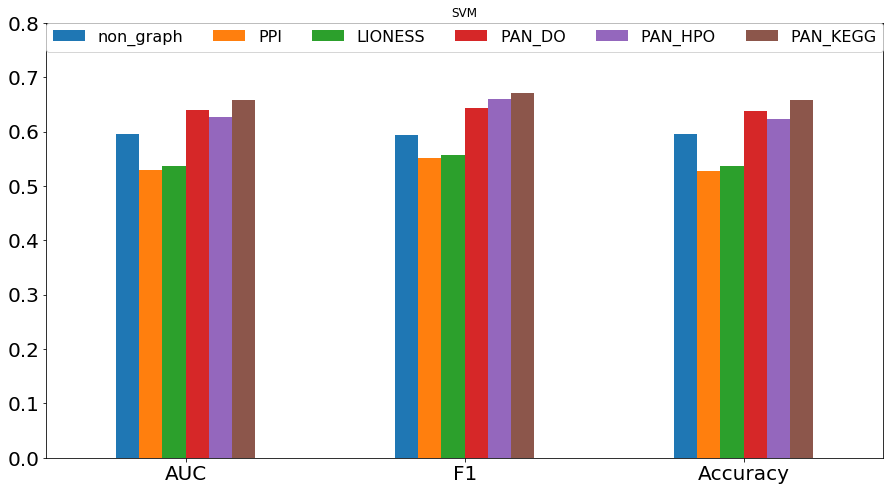

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('result.csv')
df_mean = df.groupby(['model','classifier']).mean()
df_mean = df_mean.reset_index()
df_mean = df_mean[['model','classifier','F1','Precision','Recall','Specificity','Accuracy','AUC']]
for classifier in ['LR', 'SVM']:
    df = df_mean
    df = df[ df['classifier'] == classifier ]
    df = df[['model','AUC','F1','Accuracy']]
    label = list(df['model'])
    df = df[['AUC','F1','Accuracy']]
    df = df.T
    df.columns = label
    df = df[['non_graph','PPI','LIONESS','PAN_DO','PAN_HPO', 'PAN_KEGG']]

    fig, ax = plt.subplots()
    df.plot(kind='bar', ax=ax, figsize=(15, 8))
    for tck in ax.get_yticklabels(): 
        tck.set_fontsize(20)
    xticklabels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(xticklabels,fontsize=20,rotation = 0)
    ax.legend(fontsize=16, ncol=6, mode='expand', borderaxespad=0.)
    ax.set_ylim(0,.8)
    ax.set_title(classifier)
    plt.show()
    fig.tight_layout()
    dout = 'figs/' + classifier + '.png'
    fig.savefig(dout)
    